<a href="https://colab.research.google.com/github/Marie00127/CV_Study_VISIONEERS/blob/main/CV_W4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **06. 컨볼루션 신경망**

CNN은 이미지뿐 아니라 텍스트나 음성 등 다양한 분야의 데이터 처리에 사용

이번 장에서 컨볼루션 신경망의 사용법 중 가장 기초가 되는 이미지 데이터를 다루는 방법을 알아보자.



# **6.1 특징 추출**

이전에 봤던 데이터셋들은 특징들이 데이터에 존재

이에 비해 이미지 데이터에서는 연구자가 스스로 특징을 search

이미지에서 사물의 외각선에 해당하는 특징을 발견하면 물체 감지(object detection) 알고리즘 생성 가능

SIFT(Scale-Invariant Feature Transform) 알고리즘
- 이미지의 회전과 크기에 대해 변하지 않는 특징을 추출해서 두 개의 이미지에서 서로 대응되는 부분을 찾아낸다.(?)

특징 추출 기법 중 하나인 컨볼루션(합성곱) 연산
- 각 픽셀을 본래 픽셀과 그 주변 픽셀의 조합으로 대체하는 동작

- 연산에 쓰이는 작은 행렬을 필터 또는 커널이라고 부름

수직선 검출, 수편성 검출, 흐림 효과 등등의 필터는 수작업으로 설계한 특징(Hand-crafted feature)이라고 한다.

수작업으로 설계한 특징이 갖는 3가지 문제점


1.   적용하고자 하는 분야에 대한 전문적인 지식을 필요로 한다.
2.   시간과 비용이 많이 드는 작업이다
3.   한 분야에서 효과적인 특징을 다른 분야에 적용하기 어렵다.(ex. 이미지에서 효과적인 특징을 다른 분야에 적용하기 어렵다.)

딥러닝 기반의 컨볼루션 연산은 이런 문제점들을 모두 해결

컨볼루션 신경망은 네트워크가 특징을 추출하는 필터를 자동으로 생성

계속해서 학습하면 네트워크를 구성하는 각 뉴런들은 입력한 데이터에 대해 특정 패턴을 잘 추출하도록 적응

# **6.2 주요 레이어 정리**

분류를 위한 컨볼루션 신경망 =  특징 추출기 + 분류기

특징 추출기의 역할 => 컨볼루션 레이어와 풀링 레이어

분류기 역할 => Dense 레이어

특징 추출기에서
- 컨볼루션과 풀링이 교차로 배치

분류기에서
- 과적합을 막기 위해 드롭아웃 레이어가 Dense 레이어 사이에 배치 

- 마지막 Dense 레이어 뒤에는 드롭아웃 레이어가 배치되지 않음

# **6.2.1 컨볼루션 레이어** 


컨볼루션 레이어
- 컨볼루션 레이어에서 사용하는 필터는 네트워크의 학습을 통해 자동으로 추출 
-  코드에서 지정해야 하는 값은 필터를 채우는 각 픽셀의 값이 아닌 필터의 개수

2차원을 기준으로 설명

이미지에는 원색으로 구성된, 각 이미지가 가진 색상에 대한 정보를 분리해서 담아놓는 공간인 채널 존재

컨볼루션 레이어는 
- 각 채널에 대해 계산된 값을 합쳐서 새로운 이미지를 생성
- 새로운 이미지의 마지막 차원 수는 필터의 수와 동일
- 여러개의 컨볼루션 레이어를 쌓으면서 뒤쪽 레이어로 갈수록 필터의 수를 점점 늘리기 때문에 이미지의 마지막 차원 수는 점점 증가

2차원의 이미지를 다루는 컨볼루션 레이어를 생성하는 코드
- conv1 = tf.keras.Conv2D(kernel_size=(3,3), strides=(2,2), padding = 'valid', filters = 16)

Con2D 레이어를 생성할 때의 주요 인수는 kenel_size, strides, padding, filters이다.

*   kenel_size는 필터 행렬의 크기이다. 수용 영역이라고도 한다. 앞의 숫자는 높이, 뒤의 숫자는 너비이다. 숫자를 하나만 쓸 경우는  높이와 너비의 값이 동일하다는 의미이다.

*   strides는 필터가 계산 과정에서 한 스텝마다 이동하는 크기이다. 기본값은 (1, 1)이다. kenel_size와 동일하게 앞의 숫자는 높이, 뒤의 숫자는 너비이다. 숫자를 하나만 쓸 경우는  높이와 너비의 값이 동일하다는 의미이다. strides가 달라지면 결과 이미지의 크기에 영향을 준다.

*   padding은 컨볼루션 연산 전에 입력 이미지 주변에 빈 값을 넣을지 지정하는 옵션이다. (same, valid 2가지 중 하나 선택) valid는 빈 값을 사용하지 않는다. same은  빈 값을 넣어서 출력 이미지의 크기를 입력과 같도록 보존한다. 이때 값이 0인 경우를 제로 패딩이라고 한다.

*   filters는 필터의 개수이다. 필터의 개수는 네트워크가 얼마나 많은 특징을 추출할 수 있는지 한다. 많을수록 좋지만, 너무 많은 경우 학습 속도가 느려질 수 있고, 과적합이 발생할 수 있다.



# **6.2.2 풀링 레이어**

이미지의 크기를 줄이면서 중요한 정보만 남기기 위해 서브샘플링이라는 기법을 사용한다. 효율적인 메모리 사용에 도움이 되고, 계산할 정보가 줄어들기 때문에 과적합을 방지하는 효과도 있다. 이 과정에서 사용되는 레이어가 풀링 레이어이다. 

풀링 레이어에는 여러가지가 있는데 컨볼루션 레이어에는 Max 풀링 레이어가 많이 사용된다.

MaxPool2D 레이어의 생성 코드는 다음과 같다.

pool1 = tf.keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2))

*   pool_size는 한 번에 Max 연산을 수행할 범위이다.

*   stride는 Conv2D 레이어에 나온 것과 동일하다.

pool_size=(2,2), strides=(2,2)를 사용하면 너비와 높이는 각각 절반으로 줄어든다. 홀수일 때는 내림한 값이 된다.

풀링 레이어에는 가중치가 존재하지 않아 학습되지 않고, 네트워크 구조에 따라 생략되기도 한다.

# **6.2.3 드롭아웃 레이어**

드롭아웃 레이어
- 학습 과정에서 무작위로 뉴런의 부분집합을 제거

- 네트워크가 학습할 때 같은 레이어에 있는 뉴런들은 결괏값에 의해 같은 영향을 받아 결괏값은 한쪽으로 치우치게 된다. 그래서 학습 과정에서는 확률적으로 일부 뉴런에 대한 연결을 끊고, 테스트할 때는 정상적으로 모든 값을 포함하여 계산

- 간단하지만 주요 컨볼루션 신경망에 사용

- 드롭아웃 레이어도 가중치가 없기에 학습되지 않는다. 





드롭아웃 레이어 생성코드
- pool1 = tf.keras.layers.Dropout(rate = 0.3)

- 주요 인수는 rate, 제외할 뉴런의 비율을 나타냄

정리

컨볼루션 레이어

- 특징을 추출하는 역할
- 3가지 레이어 중 유일하게 학습이 가능함

풀링 레이어

- 중요한 정보만 남기고 계산 부담을 덜어주는 역할

드롭아웃 레이어

- 과적합을 방지하는 역할

# **6.3 Fashion MNIST 데이터셋에 적용하기**

**데이터 불러온 뒤, 정규화 작업**

In [24]:
#데이터를 불러오고 정규화하는 작업
import tensorflow as tf

fashion_mnist = tf.keras.datasets.fashion_mnist

(train_X, train_Y), (test_X, test_Y) = fashion_mnist.load_data()

train_X = train_X / 255.0
test_X = test_X / 255.0

**차원 변환**

이미지는 보통 채널을 가지고 있고, Conv2D 레이어는 채널을 가진 형태의 데이터를 받도록 설정돼 있기에 reshape 사용

- Fashion MNIST 데이터를 구성하는 흑백 이미지는 1개의 채널을 갖기에 reshape 함수를 사용하여 데이터의 뒤쪽에 채널 차원 추가

- 데이터의 수는 달라지지 않음

In [25]:
#shape change
print('reshape 전 : ', train_X.shape, test_X.shape)

train_X = train_X.reshape(-1, 28, 28, 1)
test_X = test_X.reshape(-1, 28, 28, 1)

print('reshape 후 : ', train_X.shape, test_X.shape)

reshape 전 :  (60000, 28, 28) (10000, 28, 28)
reshape 후 :  (60000, 28, 28, 1) (10000, 28, 28, 1)


**데이터 확인**

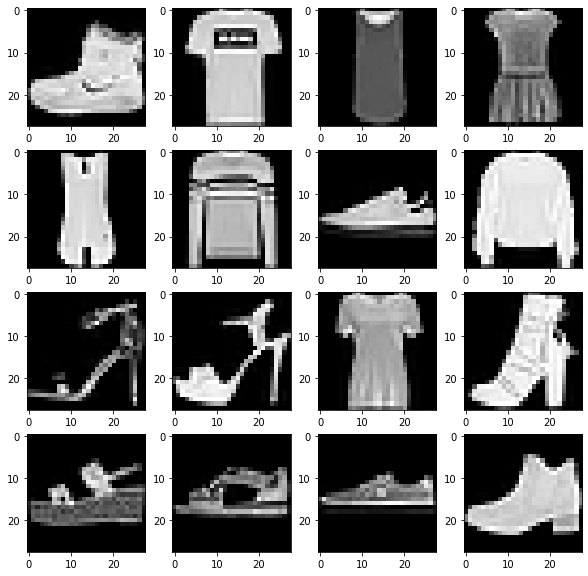

[9 0 0 3 0 2 7 2 5 5 0 9 5 5 7 9]


In [26]:
import matplotlib.pyplot as plt

#전체 그래프 크기 지정
plt.figure(figsize = (10, 10))

for c in range(16):
  #4행 4열로 지정한 그리드에서 c+1번째의 칸에 그래프를 그림
  #plt.subplot은 지정된 그리드의 각 칸에 위에서 아래, 왼쪽에서 오른쪽 순서로 그림
  plt.subplot(4, 4, c + 1)
  #그래프를 그리기 위한 데이터는 2차원이어야 하기에 reshape을 통해 3차원을 2차원으로 변환
  plt.imshow(train_X[c].reshape(28, 28), cmap = 'gray')

plt.show()

print(train_Y[:16])

**모델 생성**

비교를 위해 풀링 레이어 없이 컨볼루션 레이어만 사용하여 모델 정의

- 모델에는 총 3개의 Conv2D 레이어 사용

- 첫 레이어의 input_shape은 (28, 28, 1)로 입력 이미지의 높이, 너비, 채널 수 정의

- 필터 수는 2배씩 증가

- Flatten 레이어로 다차원 데이터를 1차원으로 정렬한 후, 2개의 Dense 레이어를 사용하여 분류기 생성

In [27]:
model = tf.keras.Sequential([
                             #특징 추출기
                             tf.keras.layers.Conv2D(input_shape = (28, 28, 1), kernel_size = (3, 3), filters = 16),
                             tf.keras.layers.Conv2D(kernel_size = (3, 3), filters = 32),
                             tf.keras.layers.Conv2D(kernel_size = (3, 3), filters = 64),
                             tf.keras.layers.Flatten(),
                             #분류기
                             tf.keras.layers.Dense(units = 128, activation = 'relu'),
                             tf.keras.layers.Dense(units = 10, activation = 'softmax')
])

model.compile(optimizer = tf.keras.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy', 
              metrics = ['accuracy'])

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_21 (Conv2D)          (None, 26, 26, 16)        160       
                                                                 
 conv2d_22 (Conv2D)          (None, 24, 24, 32)        4640      
                                                                 
 conv2d_23 (Conv2D)          (None, 22, 22, 64)        18496     
                                                                 
 flatten_4 (Flatten)         (None, 30976)             0         
                                                                 
 dense_10 (Dense)            (None, 128)               3965056   
                                                                 
 dense_11 (Dense)            (None, 10)                1290      
                                                                 
Total params: 3,989,642
Trainable params: 3,989,642
No

**모델의 퍼포먼스 확인**

퍼포먼스를 확인하기 전, 하드웨어 가속기(GPU)를 사용

간단한 배시 셀 명령어로 GPU 사양 확인


In [ ]:
!nvidia-smi

Thu Jun 30 09:07:13 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   52C    P0    27W /  70W |    330MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

**모델 학습 진행**

Epoch 1/25
1407/1407 [==============================] - 8s 6ms/step - loss: 0.4627 - accuracy: 0.8345 - val_loss: 0.3768 - val_accuracy: 0.8616
Epoch 2/25
1407/1407 [==============================] - 7s 5ms/step - loss: 0.3364 - accuracy: 0.8776 - val_loss: 0.3673 - val_accuracy: 0.8687
Epoch 3/25
1407/1407 [==============================] - 8s 5ms/step - loss: 0.2829 - accuracy: 0.8953 - val_loss: 0.3639 - val_accuracy: 0.8748
Epoch 4/25
1407/1407 [==============================] - 8s 6ms/step - loss: 0.2452 - accuracy: 0.9090 - val_loss: 0.3986 - val_accuracy: 0.8640
Epoch 5/25
1407/1407 [==============================] - 8s 5ms/step - loss: 0.2044 - accuracy: 0.9242 - val_loss: 0.4387 - val_accuracy: 0.8692
Epoch 6/25
1407/1407 [==============================] - 8s 5ms/step - loss: 0.1806 - accuracy: 0.9326 - val_loss: 0.4617 - val_accuracy: 0.8669
Epoch 7/25
1407/1407 [==============================] - 8s 5ms/step - loss: 0.1577 - accuracy: 0.9407 - val_loss: 0.5221 - val_accuracy:

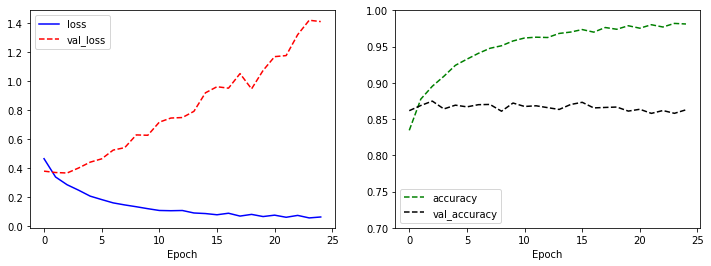

[1.4349892139434814, 0.857699990272522]

In [28]:
history = model.fit(train_X, train_Y, epochs = 25, validation_split = 0.25)

import matplotlib.pyplot as plt
plt.figure(figsize = (12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'b-', label = 'loss')
plt.plot(history.history['val_loss'], 'r--', label = 'val_loss')
plt.xlabel('Epoch')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], 'g--', label = 'accuracy')
plt.plot(history.history['val_accuracy'], 'k--', label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylim(0.7, 1)
plt.legend()

plt.show()

model.evaluate(test_X, test_Y, verbose= 0)

- 왼쪽 그래프를 보면 loss는 감소하고 val_loss는 증가하는 전형적인 과적합의 형태

- 오른쪽 그래프에서는 훈련 데이터에 대한 모델의 정확도인 accuracy가 빠르게 증가하는데 비해 검증 데이터에 대한 정확도는 학습이 진행될수록 감소 라고는 책에 되어 있지만 좀 다르게 나왔다.

- model.evaluate() 함수로 계산된 결과 중 첫번째가 테스트 데이터의 loss, 두번째는 테스트 데이터의 정확성

- 테스트 정확도는 85.42%

이를 개선하기 위해서 풀링 레이어와 드롭아웃 레이어 모두 사용

In [ ]:
model = tf.keras.Sequential([
                             #특징추출기
                             tf.keras.layers.Conv2D(input_shape = (28, 28, 1), kernel_size = (3, 3), filters = 32),
                             tf.keras.layers.MaxPool2D(strides = (2, 2)),
                             tf.keras.layers.Conv2D(kernel_size = (3, 3), filters = 64),
                             tf.keras.layers.MaxPool2D(strides = (2, 2)),
                             tf.keras.layers.Conv2D(kernel_size = (3, 3), filters = 128),
                             tf.keras.layers.Flatten(),
                             #분류기
                             tf.keras.layers.Dense(units = 128, activation = 'relu'),
                             tf.keras.layers.Dropout(rate = 0.3),
                             tf.keras.layers.Dense(units = 10, activation = 'softmax')
])

model.compile(optimizer = tf.keras.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy', 
              metrics = ['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 3, 3, 128)         73856     
                                                                 
 flatten_1 (Flatten)         (None, 1152)             

- 풀링 레이어가 이미지의 크기를 줄여주고 있기 때문에  Flatten 레이어에 들어온 파라미터 수가 1152로 예제 6.7에 비해 감소 => summary() 함수로 레이어 구조를 확인해보면 총 파라미터 개수가 예제 6.7의 약 400만에 비해 24만 정도로, 약 6% 감소

- 두 모델에서 가장 많은 파라키터가 있는 레이어는 Flatten 레이어 다음의 첫 번째 Dense 레이어이기 때문에 이 레이어에 넘어오는 파라미터 수가 적을수록 전체 파라미터 수 감소

- Dense 레이어 사이에 드롭아웃 레이어 사용

- 폴링 레이어와 드롭아웃 레이어는 과적합을 줄이는 데 기여

Epoch 1/25
1407/1407 [==============================] - 6s 4ms/step - loss: 0.1039 - accuracy: 0.9650 - val_loss: 0.6877 - val_accuracy: 0.8983
Epoch 2/25
1407/1407 [==============================] - 6s 4ms/step - loss: 0.0965 - accuracy: 0.9668 - val_loss: 0.6925 - val_accuracy: 0.8919
Epoch 3/25
1407/1407 [==============================] - 6s 4ms/step - loss: 0.0987 - accuracy: 0.9653 - val_loss: 0.6774 - val_accuracy: 0.8907
Epoch 4/25
1407/1407 [==============================] - 6s 4ms/step - loss: 0.1047 - accuracy: 0.9642 - val_loss: 0.8399 - val_accuracy: 0.8973
Epoch 5/25
1407/1407 [==============================] - 6s 4ms/step - loss: 0.1140 - accuracy: 0.9606 - val_loss: 0.6470 - val_accuracy: 0.8961
Epoch 6/25
1407/1407 [==============================] - 6s 4ms/step - loss: 0.0969 - accuracy: 0.9664 - val_loss: 0.6534 - val_accuracy: 0.8915
Epoch 7/25
1407/1407 [==============================] - 6s 4ms/step - loss: 0.1064 - accuracy: 0.9648 - val_loss: 0.7314 - val_accuracy:

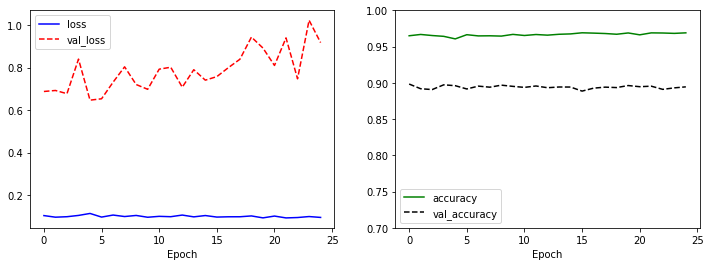

[0.9389647245407104, 0.8938000202178955]

In [ ]:
#과적합을 줄이는지 확인
history = model.fit(train_X, train_Y, epochs = 25, validation_split = 0.25)

import matplotlib.pyplot as plt
plt.figure(figsize = (12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'b-', label = 'loss')
plt.plot(history.history['val_loss'], 'r--', label = 'val_loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], 'g-', label = 'accuracy')
plt.plot(history.history['val_accuracy'], 'k--', label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylim(0.7, 1)
plt.legend()

plt.show()

model.evaluate(test_X, test_Y, verbose = 0)

- val_loss가 여전히 증가하고 있지만 val_accuracy는 일정한 수준에 머뭄
- 테스트 데이터에 대한 분류 성적 89.38%
- 풀링 레이어와 드롭아웃 레이어를 쓰지 않았을 때보다 개선된 수치

# **6.4 퍼포먼스 높이기**

위의 결과보다 더 좋은 성과, 분류 성적을 90% 이상으로 끌어올리기 가능

여러 가지 방법 중 대표적이면서 쉬운 두 가지 방법
1.   더 많은 레이어 쌓기
2.   이미지 보강



# **6.4.1 더 많은 레이어 쌓기**

딥러닝에서 네트워크 구조를 깊게 쌓는 것이 가능해진 후 딥러닝의 발전을 이끈 컨볼루션 신경망에서는 컨볼루션 레이어가 중첩 된 더 깊은 구조가 계속해서 등장 => 이전 구조의 퍼포먼스를 크게 개선

VGG는 단순한 구조이면서도 성능이 괜찮기 때문에 지금도 이미지 특징 추출을 위한 네트워크에서 많이 사용 (유명한 Style Transfer 논문에서도 VGGNet 사용)

**모델 생성**

In [ ]:
model = tf.keras.Sequential([
                             tf.keras.layers.Conv2D(input_shape=(28, 28, 1), kernel_size = (3, 3), filters = 32, padding = 'same', activation = 'relu'),
                             tf.keras.layers.Conv2D(kernel_size = (3, 3), filters = 64, padding = 'same', activation = 'relu'),
                             tf.keras.layers.MaxPool2D(pool_size = (2, 2)),
                             tf.keras.layers.Dropout(rate = 0.5),
                             tf.keras.layers.Conv2D(kernel_size = (3, 3), filters = 128, padding = 'same', activation = 'relu'),
                             tf.keras.layers.Conv2D(kernel_size = (3, 3), filters = 256, padding = 'valid', activation = 'relu'),
                             tf.keras.layers.MaxPool2D(pool_size = (2, 2)),
                             tf.keras.layers.Dropout(rate = 0.5),
                             tf.keras.layers.Flatten(),
                             tf.keras.layers.Dense(units = 512, activation = 'relu'),
                             tf.keras.layers.Dropout(rate = 0.5),
                             tf.keras.layers.Dense(units = 256, activation = 'relu'),
                             tf.keras.layers.Dropout(rate = 0.5),
                             tf.keras.layers.Dense(units = 10, activation = 'softmax')
])

model.compile(optimizer = tf.keras.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy', 
              metrics = ['accuracy'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_13 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 conv2d_14 (Conv2D)          (None, 28, 28, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 dropout_2 (Dropout)         (None, 14, 14, 64)        0         
                                                                 
 conv2d_15 (Conv2D)          (None, 14, 14, 128)       73856     
                                                                 
 conv2d_16 (Conv2D)          (None, 12, 12, 256)       295168    
                                                      

VGG-19
- VGG-19가 제일 깊은 구조
- 특징 추출기의 초반에 컨볼루션 레이어를 2개 겹친 뒤 풀링 레이어 1개를 사용하는 패턴을 2번 반복

- 컨볼루션 레이어를 4개 겹친 뒤 풀링 레이어 1개를 사용하는 패턴을 3번 반복

여기서는 대상 이미지도 작고 연산 능력의 한계도 있어 컨볼루션 레이어를 2개 겹치고 폴링 레이어를 1개 사용하는 패턴을 2번 반복

폴링 레이어의 다음에 드롭아웃 레이어를 위치하여 과적합을 방지하고, Flatten 레이어 다음에 이어지는 3개의 Dense 레이어 사이에도 드롭아웃 레이어 배치

총 파라미터 수는 520만 개로 적지 않고, 예제 6.10의 24만 개보다는 약 20배 이상 증가한 숫자

**모델 성능 확인**

Epoch 1/25
1407/1407 [==============================] - 15s 10ms/step - loss: 0.5811 - accuracy: 0.7888 - val_loss: 0.3262 - val_accuracy: 0.8730
Epoch 2/25
1407/1407 [==============================] - 12s 9ms/step - loss: 0.3684 - accuracy: 0.8693 - val_loss: 0.2895 - val_accuracy: 0.8910
Epoch 3/25
1407/1407 [==============================] - 13s 10ms/step - loss: 0.3310 - accuracy: 0.8824 - val_loss: 0.2603 - val_accuracy: 0.9035
Epoch 4/25
1407/1407 [==============================] - 13s 10ms/step - loss: 0.3015 - accuracy: 0.8910 - val_loss: 0.2602 - val_accuracy: 0.9019
Epoch 5/25
1407/1407 [==============================] - 14s 10ms/step - loss: 0.2889 - accuracy: 0.8948 - val_loss: 0.2296 - val_accuracy: 0.9159
Epoch 6/25
1407/1407 [==============================] - 12s 9ms/step - loss: 0.2791 - accuracy: 0.8980 - val_loss: 0.2380 - val_accuracy: 0.9146
Epoch 7/25
1407/1407 [==============================] - 12s 9ms/step - loss: 0.2702 - accuracy: 0.9012 - val_loss: 0.2278 - va

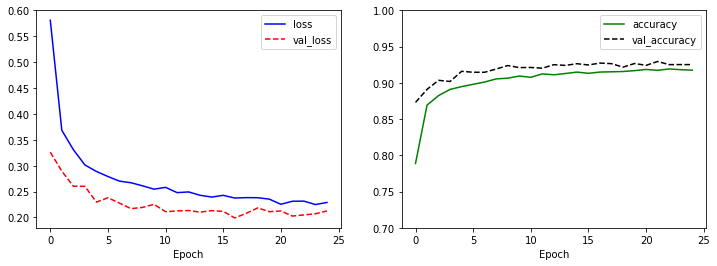

[0.2277514636516571, 0.9212999939918518]

In [ ]:
history = model.fit(train_X, train_Y, epochs = 25, validation_split = 0.25)

import matplotlib.pyplot as plt
plt.figure(figsize = (12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'b-', label = 'loss')
plt.plot(history.history['val_loss'], 'r--', label = 'val_loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], 'g-', label = 'accuracy')
plt.plot(history.history['val_accuracy'], 'k--', label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylim(0.7, 1)
plt.legend()

plt.show()

model.evaluate(test_X, test_Y, verbose = 0)

- val_loss 잘 증가하지 않는 그래프 획득
- 테스트 데이터에 대한 분류 성적도 지금까지의 성적 중 92.12%로 가장 우수
- 모델이 과적합되지 않았기에 에포크 수 늘려서 돌리기 가능

# **6.4.2 이미지 보강**

이미지 보강
- 훈련 데이터에 없는 이미지를 새롭게 만들어 훈련 데이터를 보강하는 것
- 새로운 이미지는 훈련 데이터의 이미지를 원본으로 삼고 일정한 변형을 가해서 생성

같은 신발 이미지가 훈련 데이터에 있을 때, 

신발코가 왼쪽을 향하는 이미지만 훈련 데이터에 있고 테스트 데이터에는 신발코가 오른쪽을 향하는 이미지가 있을 경우,

컨볼루션 신경망이 테스트 데이터에서 새롭게 나오는 이미지에 대해 좋은 퍼포먼스 내는 것 불가능



이때, 이미지를 가로로 뒤집어서 신발코가 오른쪽을 향하는 이미지도 만들고, 회전, 기울기, 확대, 평행이동을 하여 다양한 이미지를 만들어내 훈련 데이터의 표현력을 더 좋게 만드는 것

tf.keras에는 이런 이미지 보강 작업을 쉽게 해주는 ImageDataGenerator 존재

**이를 활용하여 훈련 데이터의 첫 번째 이미지 변형**

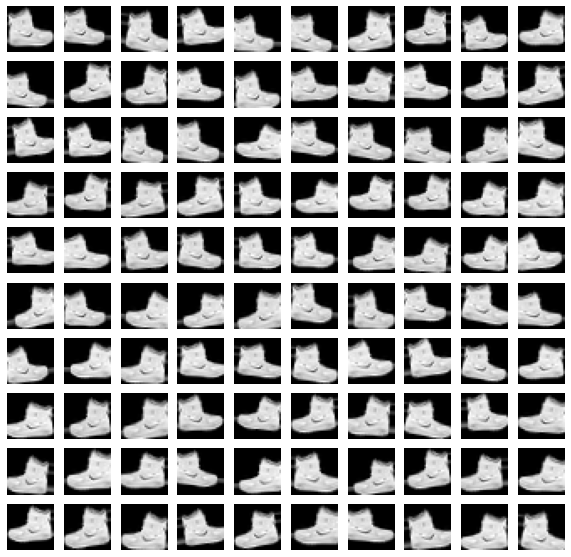

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np

image_generator = ImageDataGenerator(
    rotation_range = 10,
    zoom_range = 0.1,
    shear_range = 0.5,
    width_shift_range = 0.10,
    height_shift_range = 0.10,
    horizontal_flip = True,
    vertical_flip = False
)

augment_size = 100

x_augmented = image_generator.flow(np.tile(train_X[0].reshape(28*28), 100).reshape(-1, 28, 28, 1), np.zeros(augment_size), batch_size = augment_size, shuffle = False).next()[0]

#새롭게 생성된 이미지 표시
import matplotlib.pyplot as plt
plt.figure(figsize = (10, 10))

for c in range(100):
  plt.subplot(10, 10, c+1)
  plt.axis('off')
  plt.imshow(x_augmented[c].reshape(28, 28), cmap = 'gray')

plt.show()

ImageDataGenerator의 주요 인수
- rotation_range
- zoom_range
- shear_range 등

horizontal_flip
- 이미지 가로축으로 뒤집기

vertical_flip
- 이미지 세로축으로 뒤집기
- 사용하지 않는다
- Fashion MNIST는 보통 이미지가 위아래로 반듯하게 놓여 있기에 vertical_flip을 사용하면 대비하지 않아도 될 경우에 대해서도 대비하게 되어 퍼포먼스가 떨어짐

flow()
- 실제로 보강된 이미지를 생성
- Iterator라는 객체 생성

Iterator
- 이 객체에서는 값을 순차적으로 꺼내기 가능
- 값을 꺼내는 방법은 next() 함수 사용하기

한 번에 생성할 이미지의 양인 batch_size를 위에서 설정한 augment_size와 같은 100으로 설정했기 때문에 next() 함수로 꺼내는 이미지는 100장

실제로 훈련 데이터 이미지 보강을 위해 **다량의 이미지를 생성하고 학습을 위해 훈련 데이터에 추가**

In [ ]:
image_generator = ImageDataGenerator(
    rotation_range = 10,
    zoom_range = 0.1,
    shear_range = 0.5,
    width_shift_range = 0.10,
    height_shift_range = 0.10,
    horizontal_flip = True,
    vertical_flip = False
)

augment_size = 30000

randidx = np.random.randint(train_X.shape[0], size = augment_size)
x_augmented = train_X[randidx].copy()
y_augmented = train_Y[randidx].copy()
x_augmented = image_generator.flow(x_augmented, np.zeros(augment_size), batch_size = augment_size, shuffle = False).next()[0]

# 원래 데이터인 x_train에 이미지 보강된 x_augmented를 추가
train_X = np.concatenate((train_X, x_augmented))
train_Y = np.concatenate((train_Y, y_augmented))

print(train_X.shape)

(90000, 28, 28, 1)


훈련 데이터의 50%인 30000개의 이미지를 추가하기 위해 augmen_size를 30000으로 설정

=> 이미지를 변형할 원본 이미지를 찾기 위해 np.random.randint() 함수를 사용하여 0~59999 범위의 정수 중에서 300000개의 정수 선택

(중복 되지 않는 것을 원하면 원래 함수 대신 np.random.choice() 함수를 사용하고 replace를 False로 설정)

randidx는 정수로 구성된 넘파이 array

이것을 이용하여 train_X에서 각 array 원소가 가리키는 이미지를 train_X[randidx]로 한 번에 선택 가능

선택한 데이터는 원본 데이터를 참조하는 형태이기에 원본 데이터에 영향을 주지 않기 위해 copy()함수로 안전하게 복사본을 생성

=>그 다음은 ImageDataGenerator의 flow() 함수로 30000개의 새로운 이미지를 생성

mp.concatenate() 함수로 훈련 데이터에 보강 이미지를 추가

최종 출력에서 train_X.shape의 첫 번째 차원 수는 90000이 되어 정상적으로 이미지가 추가된 것 확인 가능

**예제 6.12의 VGGNet 스타일의 네트워크에 ImageDataGenerator로 보강된 훈련 데이터를 학습**

Epoch 1/25
2110/2110 [==============================] - 20s 9ms/step - loss: 0.5640 - accuracy: 0.7947 - val_loss: 0.5536 - val_accuracy: 0.7904
Epoch 2/25
2110/2110 [==============================] - 17s 8ms/step - loss: 0.3793 - accuracy: 0.8633 - val_loss: 0.4893 - val_accuracy: 0.8189
Epoch 3/25
2110/2110 [==============================] - 17s 8ms/step - loss: 0.3411 - accuracy: 0.8764 - val_loss: 0.4879 - val_accuracy: 0.8124
Epoch 4/25
2110/2110 [==============================] - 18s 8ms/step - loss: 0.3229 - accuracy: 0.8836 - val_loss: 0.4226 - val_accuracy: 0.8392
Epoch 5/25
2110/2110 [==============================] - 18s 8ms/step - loss: 0.3074 - accuracy: 0.8892 - val_loss: 0.4255 - val_accuracy: 0.8370
Epoch 6/25
2110/2110 [==============================] - 18s 9ms/step - loss: 0.2979 - accuracy: 0.8921 - val_loss: 0.4160 - val_accuracy: 0.8435
Epoch 7/25
2110/2110 [==============================] - 18s 8ms/step - loss: 0.2945 - accuracy: 0.8929 - val_loss: 0.4200 - val_ac

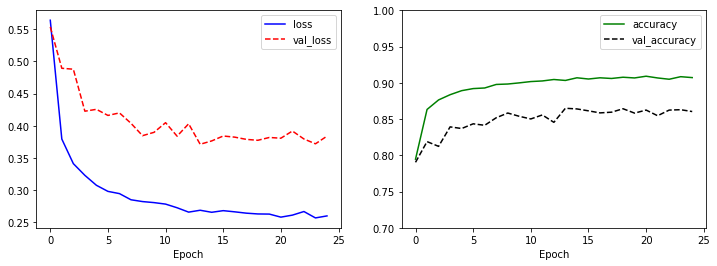

[0.21931663155555725, 0.9241999983787537]

In [ ]:
model = tf.keras.Sequential([
                             tf.keras.layers.Conv2D(input_shape=(28, 28, 1), kernel_size = (3, 3), filters = 32, padding = 'same', activation = 'relu'),
                             tf.keras.layers.Conv2D(kernel_size = (3, 3), filters = 64, padding = 'same', activation = 'relu'),
                             tf.keras.layers.MaxPool2D(pool_size = (2, 2)),
                             tf.keras.layers.Dropout(rate = 0.5),
                             tf.keras.layers.Conv2D(kernel_size = (3, 3), filters = 128, padding = 'same', activation = 'relu'),
                             tf.keras.layers.Conv2D(kernel_size = (3, 3), filters = 256, padding = 'valid', activation = 'relu'),
                             tf.keras.layers.MaxPool2D(pool_size = (2, 2)),
                             tf.keras.layers.Dropout(rate = 0.5),
                             tf.keras.layers.Flatten(),
                             tf.keras.layers.Dense(units = 512, activation = 'relu'),
                             tf.keras.layers.Dropout(rate = 0.5),
                             tf.keras.layers.Dense(units = 256, activation = 'relu'),
                             tf.keras.layers.Dropout(rate = 0.5),
                             tf.keras.layers.Dense(units = 10, activation = 'softmax')
])

model.compile(optimizer = tf.keras.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy', 
              metrics = ['accuracy'])

history = model.fit(train_X, train_Y, epochs = 25, validation_split = 0.25)

import matplotlib.pyplot as plt
plt.figure(figsize = (12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'b-', label = 'loss')
plt.plot(history.history['val_loss'], 'r--', label = 'val_loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], 'g-', label = 'accuracy')
plt.plot(history.history['val_accuracy'], 'k--', label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylim(0.7, 1)
plt.legend()

plt.show()

model.evaluate(test_X, test_Y, verbose = 0)

테스트 데이터에 대한 분류 성적은 92.41%로 92.12%로 증가

val_accuracy도 증가하는 추세를 보이고 있지 않아 모델이 아직 과적합되지 않은 것으로 판단

조금 더 학습시키면 성적이 더 잘 나올 것으로 기대